# Stokes

In [1]:
from __future__ import print_function
from fenics import *

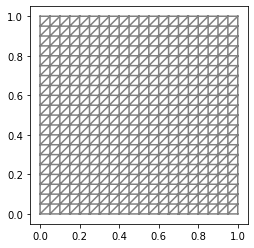

In [2]:
mesh = UnitSquareMesh(20,20)
plot(mesh)

In [9]:
V = VectorElement("CG", mesh.ufl_cell(), 2)
Q = FiniteElement("CG", mesh.ufl_cell(), 1)
TH = V * Q
W = FunctionSpace(mesh, TH)

In [11]:
bc1 = 'near(x[0], 0) || near(x[0], 1) || near(x[1], 0)'
bc2 = 'near(x[1], 1)'

V_= VectorFunctionSpace(mesh,"CG", 2)
bcu_1  = DirichletBC(V_, Constant((0, 0)), bc1)
bcu_2  = DirichletBC(V_, Constant((1, 0)), bc2)

In [13]:
v, q = TestFunctions(W)
s = TrialFunction(W)
u, p = split(s)

In [14]:
f   = Constant((0, 0))
mu  = Constant(1)

In [15]:
a = inner(nabla_grad(u), nabla_grad(v))*dx + div(u)*q*dx + div(v)*p*dx
L = dot(f,v)*dx

In [17]:
w=Function(W)
solve(a == L, w)

Solving linear variational problem.


In [18]:
u,p=split(w)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Object cannot be plotted directly, projecting to piecewise linears.
Calling FFC just-in-time (JIT) compiler, this may take some time.


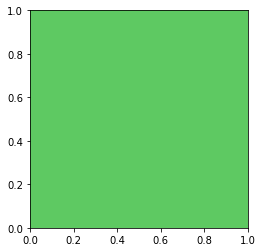

In [20]:
plot(p)